<h1>1단계) 탐색 : titanic데이터 살펴보기</h1>

pclass = Passenfer Class 승객 등급

survived = 생존여부(생존1, 사망0)

name = 승객 이름

sex = 승객 성별

age = 승객 나이

sibsp = 동승한 형제 또는 자매

parsh = 동승한 부모 또는 자녀수

ticket = 티켓 번호

fare = 승객 지불 금액

cabin = 선실 이름

embarked = 승선함(C = 쉘 부르크, Q = 퀸즈타운, S = 사우스 헴튼)

body = 사망자 확인 번호

home.dest = 고향/목적지

In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv("data/titanic_train.csv")
df_test = pd.read_csv('data/titanic_test.csv')

df_train.headad(5)

AttributeError: 'DataFrame' object has no attribute 'headad'

In [40]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [41]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB
None


name, cabin 은 당장 분석에 사용하지 않아 삭제

ticket, home, body 는 큰 의미를 가지고 있지 않아 삭제

In [42]:
df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis=1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis=1)

생존 여부를 그룹으로 묶어 pclass 피처의 그룹별 분포를 출력한다.

0    563
1    353
Name: survived, dtype: int64


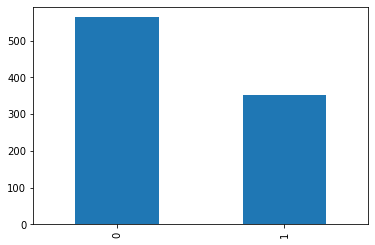

In [43]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

0    246
1    147
Name: survived, dtype: int64


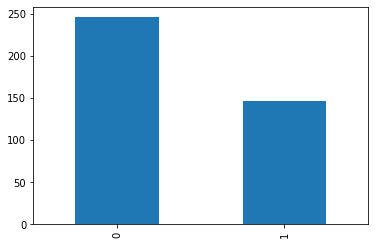

In [44]:
print(df_test['survived'].value_counts())
df_test['survived'].value_counts().plot.bar()

그룹 비율은 3:5 정도//

pclass 피처는 생존자 분류에 유의미한 영향을 미침을 볼 수 있다.

3    498
1    230
2    188
Name: pclass, dtype: int64


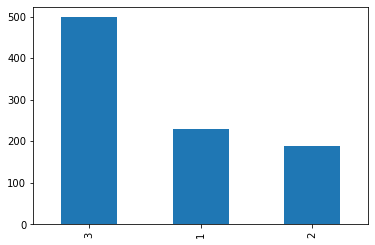

In [45]:
print(df_train['pclass'].value_counts())
df_train['pclass'].value_counts().plot.bar()

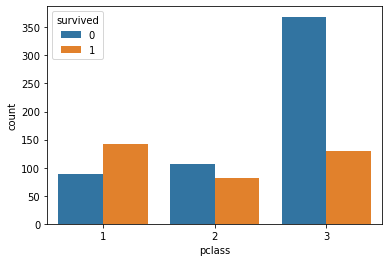

In [46]:
ax = sns.countplot(x='pclass', hue='survived', data=df_train)

수치형 피처들에 대한 탐색을 진행

자동화 함수를 사용//

1. 두 그룹간의 분포를 비교

2. 두 그룹간의 표준편차를 출력

3. 두 그룹간의 T-test 검정을 실시

4. 두 그룹간의 shapiro-wilk 검정 실시

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587.
The w-statistic and p-value in Survived 0.982 and 0.001.
The w-statistic and p-value in Non-Survived 0.968 and 0.000.
data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015.


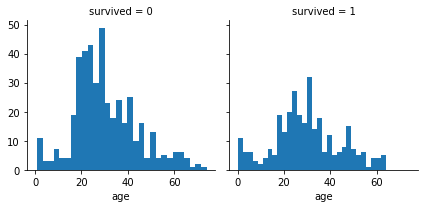

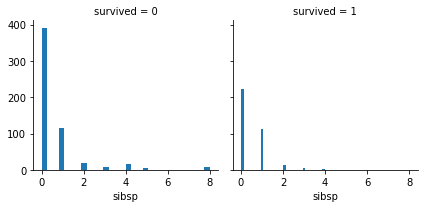

In [47]:
from scipy import stats

def valid_features(df, col_name, distribution_check = True):
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    #두 집단의 표준편차 출력
    titanic_survived = df[df['survived'] == 1]
    titanin_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%.2f' % np.std(titanin_survived_static))
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_n_survived_static))
    
    # T-test 로 두 집단의 평균 차이를 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name],
                                  titanic_n_survived[col_name])
    
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name],
                                        titanic_n_survived[col_name],
                                        equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-Wilk 검정 : 분포의 정규성 정도 검증
        print("The w-statistic and p-value in Survived %.3f and %.3f." % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f." % stats.shapiro(titanic_n_survived[col_name]))
        
#앞서 정의한 valid_features 함수를 실행한다. age피처 탐색
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
##앞서 정의한 valid_features 함수를 실행한다. sibsp피처 탐색
valid_features(df_train,'sibsp', distribution_check=False)

분석 결과 

age는 두 그룹간의 차이가 없기 때문에 생존자 분류에 미치는 영향이 낮다

sibsp는 두 그룹간의 평균 차이가 어느 정도 존재 한다는 것을 알 수 있다

<h1>연습문제</h1>

sex, embarked, parch, fare 간의 차이를 탐색 //

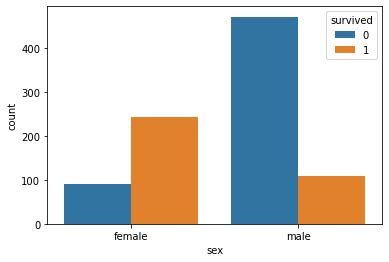

In [48]:
ax = sns.countplot(x='sex', hue='survived', data=df_train)

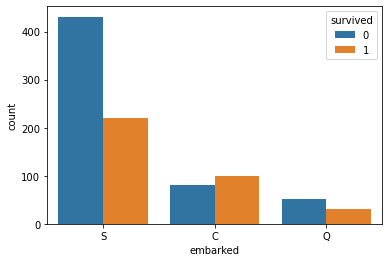

In [49]:
ax = sns.countplot(x='embarked', hue='survived', data=df_train)

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052.


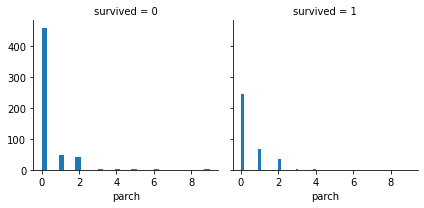

In [50]:
valid_features(df_train, 'parch',distribution_check=False)

data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000.


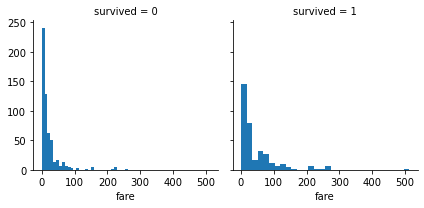

In [51]:
valid_features(df_train, 'fare',distribution_check=False)

pclass >>> 두 그룹간 분포 or 평균차이 높음

age >>> 두 그룹간 분포 or 평균차이 낮음

sibsp, parch >>> 두 그룹간 분포 or 평균차이 보통

fare >>> 두 그룹간 분포 or 평균차이 높음

sex >>> 두 그룹간 분포 or 평균차이 높음

embarked >>> 두 그룹간 분포 or 평균차이 보통

<h1>2단계) 분류: 생존자 분류 모델</h1>

분류모델 만드는 방법

1. 로지스틱 회귀 모델 >>>
예측값 Y를 0-1사이 값으로 제한하여 0.5보다 크면 1, 0.5보다 작으면 0이라고
분류하는 방법
2. 사용방법 >>> 
    1.결측값 처리
        1. 결측값 데이터 삭제
        2. 평균값, 중앙값, 최빈값(주어진 자료중 가장 많은 빈도로 나타나는 데이터)을 채워넣는것
        
        원-핫 인코딩 방법으로 범주형 변수를 변환한다.
        하나의 데이터 셋으로 합치고, 합친 df에 원-핫 인코딩을 적용한 뒤 다시 train과 test로 데이터를 분리한다

<분류 모델 전처리>

In [52]:
#평균값으로 결측값 대체하기
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#최빈값으로 결측값 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

#one-how encoding을 위한 통합 데이터 프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#pandas 패키지를 이용한 one-hot 인코딩
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [53]:
#데이터를 학습 데이터 셋, 테스트 데이터 셋으로 분리한다.

x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

sklearn 모듈의 LogisticRegression 클래스로 모델을 학습한다.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#데이터를 학습 데이터셋, 테스트 데이터셋으로 분리한다.
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

#로지스틱 회귀모델을 학습한다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

#학습한 모델의 테스트 ㅔㄷ이터셋에 대한 예측결과를 반환한다.
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]


분류 평가를 위해 오차행렬을 사용한다

<h4>오차행렬</h4>

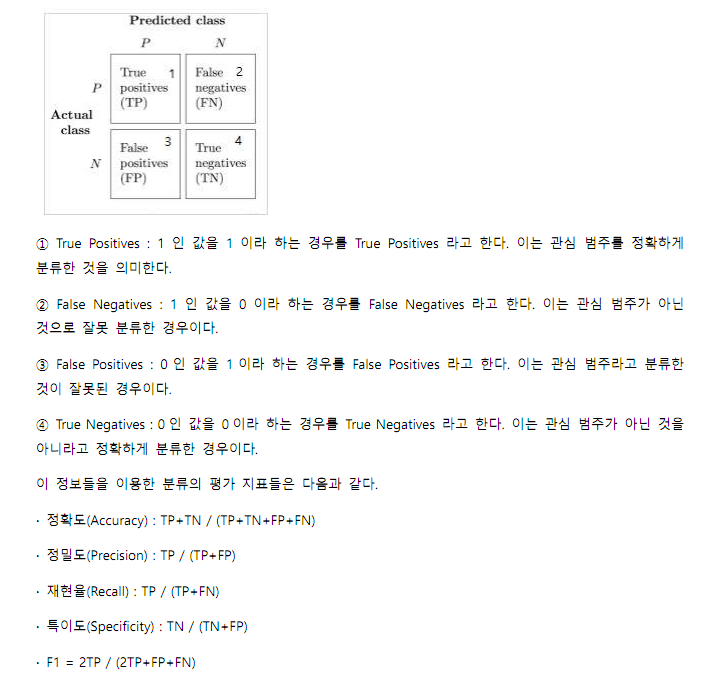

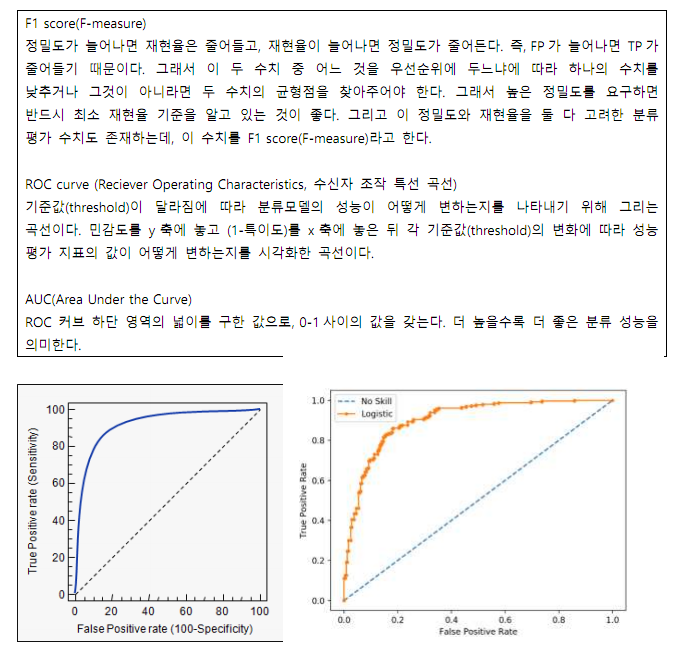

In [55]:
#분류 모델 평가

#테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
Precision: 0.756
Recall: 0.673
F1: 0.712


Confusion Matrix 기반

In [56]:
from sklearn.metrics import confusion_matrix

#Confusion MAtrix 를 출력

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


AUC % ROC curve

AUC 출력은 분류 결과 0 or 1의 y값(y_pred)을 사용하는 것이 아니라

분류 직전의 확률값(y_pred_probability)인 0~1사이 값을 사용해야 한다.

AUC를 출력함과 동시에 ROC curve그래프로 나타낸다

AUC:0.838


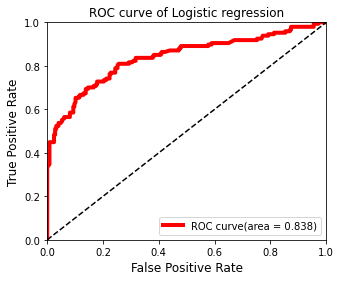

In [57]:
#Logistic Regression model AUC

from sklearn.metrics import roc_curve, roc_auc_score

#AUC를 계산하여 출력한다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print("AUC:%.3f" %roc_auc)

#ROC curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area = %0.3f)' %roc_auc,
        color = 'red', linewidth = 4.0)
plt.plot([0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title("ROC curve of Logistic regression")
plt.legend(loc='lower right')
plt.show()

의사결정 나무 모델 적용

accuracy: 0.76
Precision: 0.699
Recall: 0.646
F1: 0.671
AUC:0.747


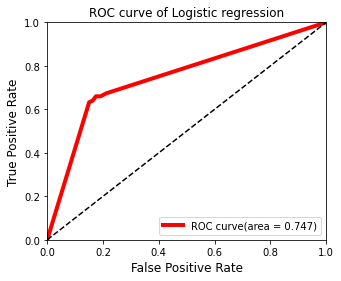

In [58]:
from sklearn.tree import DecisionTreeClassifier


#의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환한다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]


#학습한 모델의 성능을 계산하여 출력한다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


#학습한 모델의 AUC를 계산하여 출력한다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print("AUC:%.3f" %roc_auc)


#ROC curve를 그래프로 출력한다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area = %0.3f)' %roc_auc,
        color = 'red', linewidth = 4.0)
plt.plot([0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title("ROC curve of Logistic regression")
plt.legend(loc='lower right')
plt.show()

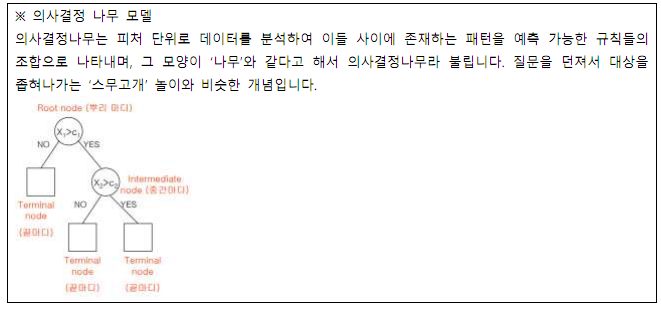

<h1>3단계) 모델 개선 : 피처 엔지니어링</h1>

모델의 성늘을 끌어올리기 위한 방법은
<br>더 좋은 분류 기법을 사용하는 것 or 더 많은 데이터를 사용하는 것

이럴때 >>> 피처 엔지니어링을 사용

피처 엔지니어링 : 모델에 사용할 피처를 가공하는 분석작업

age, embark 피처의 결측값을 처리해준 뒤, whole_df 에 데이터 프레임을 생성한다.

In [72]:
df_train = pd.read_csv("data/titanic_train.csv")
df_test = pd.read_csv("data/titanic_test.csv")

#데이터를 다시 불러온다.
df_train = df_train.drop(['ticket','body','home.dest'], axis=1)
df_test = df_test.drop(['ticket','body','home.dest'], axis=1)

#age 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embarked: 2개 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

#one-how encoding을 위한 통합 데이터 프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

print(whole_df['cabin'].value_counts()[:10])

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
F2                 4
F33                4
C78                4
B96 B98            4
C22 C26            4
D                  4
Name: cabin, dtype: int64


위 자료 결과 선실은 앞에 알파벳이 붙는 규칙성을 가지고 있다.
<br>자료가 너무 적은 G 와 T는 X로 대체하고 cabin 피처의 첫번째 알파벳을 추출하기 위해 처리과정을 한다.

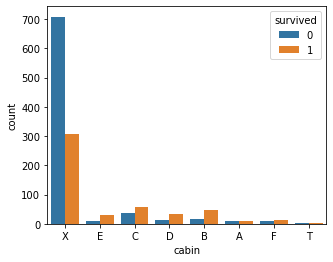

In [73]:
#결측 데이터 경우 X 로 대체
whole_df['cabin'] = whole_df['cabin'].fillna("X")

#cabin 피처의 첫 번째 문자를 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

#추출한 문자 중 G와 T 경우 X로 대체
whole_df['cabin'] = whole_df['cabin'].replace({"G":"T", "T":"X"})

ax = sns.countplot(x='cabin', hue='survived', data= whole_df)
plt.show()

전처리 완료된 자료를 봣을때 생존자/비생존자 간의 유의미함이 sck가 있는것으로 보인다.

name 피처를 살펴봤을때 이름이라는 데이터를 피처로 어떻게 사용할지 판단하기 어렵다.

하지만 데이터를 살펴보면 이 피처 또한 데이터 간의 공통점을 발견 할 수 있다.

이름 구성 중간에 들어가는 호칭 정보이다.

데이터 셋의 이름중 Bredley, Miss, Bridger Delia 이름을 예로 본다면,

이 이름은 Bradley라는 성, Miss라는 호칭, Bridger Delia 라는 이름으로 구성되어 있다.

그리고 모든 이름은 이러한 형태로 구성 되어 있다.

당시 사회적 계급이 존재하여 호칭 정보가 매우 중요한 데이터 정보로 활용 될 수 있다.

In [74]:
#이름에서 호칭을 추출한다.
name_grade = whole_df['name'].apply(lambda x: x.split(",",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

[' Miss', ' Mr', ' Master', ' Mrs', ' Dr', ' Mlle', ' Col', ' Rev', ' Ms', ' Mme', ' Sir', ' the Countess', ' Dona', ' Jonkheer', ' Lady', ' Major', ' Don', ' Capt']


추출한 호칭으로 여섯가지의 사회적 지위로 정의할 수 있다.
A~F의 범주형 데이터로 변환하는 작업을 수행한다.

In [75]:
#호칭에 따라 사회적 지위(1910년대 기준)
grade_dict = {'A':['Rev','Col','Major','Dr','Capt','Sir'], #명예직
             'B':['Ms','Mme','Mrs','Dona'], #여성
             'C':['Jonkheer','the Countess'], #귀족이나 작위
             'D':['Mr','Don'], #남성
             'E':['Master'], #젊은 남성
             'F':['Miss','Mlle','Lady']}# 젊은 여성
              
def give_grade(x):
    grade = x.split(", ",1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
            
    return "G"


whole_df["name"] = whole_df['name'].apply(lambda x: give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


In [76]:
print(whole_df["name"])

0      F
1      F
2      F
3      D
4      F
      ..
388    D
389    B
390    D
391    D
392    F
Name: name, Length: 1309, dtype: object


<h1>연습문제</h1>

name 피처에 대해 생존자/사망자의 차이를 탐색

그룹간의 분포가 어떻게 다른지 시각적으로 탐색

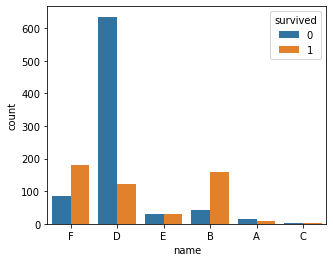

In [77]:
ax = sns.countplot(x='name', hue='survived', data= whole_df)
plt.show()

In [78]:
from scipy import stats

chis = stats.chisquare(whole_df[whole_df['survived']==1]['cabin'].value_counts().sort_index(),
                      whole_df[whole_df['survived']==0]['cabin'].value_counts().sort_index())

print("statistic = %.3f, pvalue = %.3f" %chis)

statistic = 344.239, pvalue = 0.000


In [79]:
#모델 학습을 위한 마지막 전처리 // 모든 범주형 피처들의 원-핫 인코딩을 적용
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_T,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


accuracy: 0.80
Precision: 0.739
Recall: 0.714
F1: 0.727
AUC:0.853


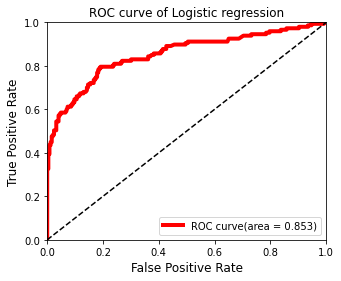

In [80]:
#데이터 셋 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

#로지스틱 회귀모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

#학습한 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표 출력
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

#AUC 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print("AUC:%.3f" %roc_auc)

#ROC curve 그래프 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area = %0.3f)' %roc_auc,
        color = 'red', linewidth = 4.0)
plt.plot([0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title("ROC curve of Logistic regression")
plt.legend(loc='lower right')
plt.show()

분류 모델의 피처 영향력을 그래프로 살펴본다.
피처 엔지니어링으로 생성된 'name', 'cabin' 피처의 영향력이 가장 크다는 것을 알 수 있다.

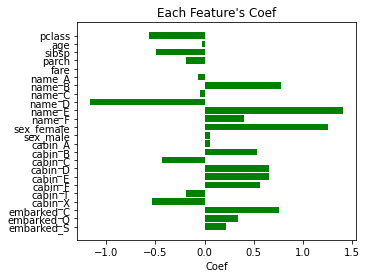

In [81]:
#예측 대상 survived 피처를 제외한 모든 피처를 리스트로 반환한다.
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

#각 피처별 회귀 분석 계수를 그래프의 X축으로 하여, 피처 영향력 그래프를 출력한다.
plt.rcParams['figure.figsize'] = [5, 4]
fig,ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel("Coef")
ax.set_title("Each Feature's Coef")

plt.show()

<h1>4단계) 평가 : 모델 검증</h1>

모델 검증을 위해서는 모델의 과적합 여부를 검증해야 된다.
1. k-fold 교차검증
2. 학습곡선

<h2>k-fold 교차 검증</h2>

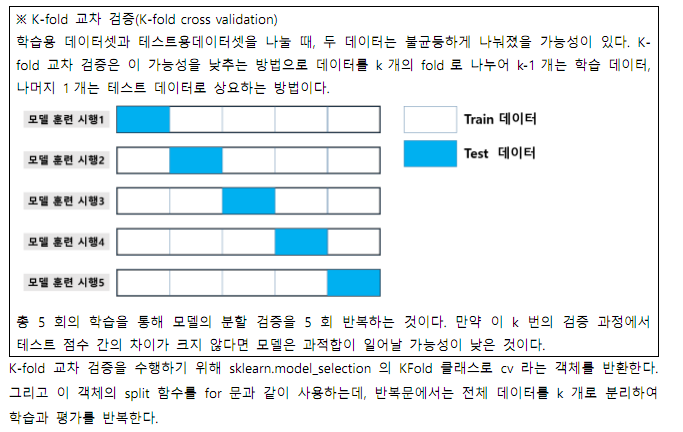

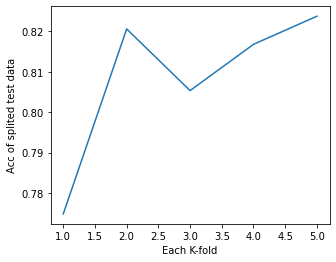

In [82]:
#K-fold 교차검증 통한 과적합 검증
from sklearn.model_selection import KFold


#교차검증의 k를 5로 설정한다.
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []


#k-fold 를 5번 분할 학습으로 반복한다.
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    #5개로 분할된 fold중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 >>
    #반복시 테스트 테이터셋으로 변경
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    #survived 피처를 y 나머지를 x 데이터로 저장한다.
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    #주어진 데이터로 로지스틱 회귀 모델을 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    #테스트 데이터셋의 ACcuracy를 계산하여 acc_history에 저장한다.
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)
    
#acc_history에 저장된 5번의 학습 결과 Accuracy를 그래프로 출력
plt.xlabel("Each K-fold")
plt.ylabel('Acc of splited test data')
plt.plot(range(1, k+1), acc_history)

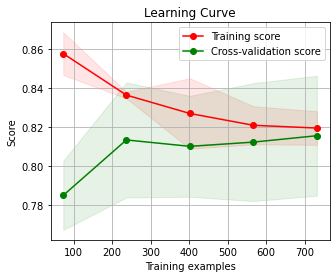

In [83]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()